RNN CON LSTM

In [1]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from datetime import datetime
import keras

# 1. Importar los datos

In [2]:
df=pd.read_csv('Aportes.csv',parse_dates=True,index_col='Date')
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Year,Month,Value,PosibleNino,PosibleNina,Precipitaciones,Temperaturas,Humedades,Name,AporCaudal
Date,,,,,,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,23.6,96.0,NARE,43.51
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,26.7,95.0,NARE,43.67
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,24.0,96.0,NARE,41.21
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,2000,1,-1.7,0,0,4.6,22.4,98.0,NARE,43.80
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,2000,1,-1.7,0,1,0.0,21.0,98.0,NARE,40.62


# 2. Preprocesamiento

In [3]:
df.drop(['Name','Year','Month','PosibleNino','PosibleNina'],axis=1,inplace=True)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,Temperaturas,Humedades,AporCaudal
Date,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,23.6,96.0,43.51
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,26.7,95.0,43.67
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,24.0,96.0,41.21
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,22.4,98.0,43.80
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,21.0,98.0,40.62


In [4]:
df['ValorAnterior']=df['AporCaudal'].shift(1)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,Temperaturas,Humedades,AporCaudal,ValorAnterior
Date,,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,23.6,96.0,43.51,NaN
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,26.7,95.0,43.67,43.51
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,24.0,96.0,41.21,43.67
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,22.4,98.0,43.80,41.21
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,21.0,98.0,40.62,43.80


In [5]:
df.drop(['Temperaturas','Humedades'],axis=1, inplace=True)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,AporCaudal,ValorAnterior
Date,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,43.51,NaN
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,43.67,43.51
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,41.21,43.67
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,43.80,41.21
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,40.62,43.80


Reemplazar datos faltantes

In [6]:
df = df.fillna(df.mean())

In [7]:
df.isna().sum()

20E                0
70E                0
80E                0
100E               0
120E               0
140E               0
160E               0
120W               0
40W                0
10W                0
Value              0
Precipitaciones    0
AporCaudal         0
ValorAnterior      0
dtype: int64

In [8]:
df.tail()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,AporCaudal,ValorAnterior
Date,,,,,,,,,,,,,,
2023-08-27,0.21,-0.07,0.23,-0.11,-0.32,-0.4,-0.24,0.07,0.29,0.38,1.3,0.0,40.475,42.926
2023-08-28,0.21,-0.07,0.23,-0.11,-0.32,-0.4,-0.24,0.07,0.29,0.38,1.3,26.4,39.386,40.475
2023-08-29,0.21,-0.07,0.23,-0.11,-0.32,-0.4,-0.24,0.07,0.29,0.38,1.3,0.0,32.565,39.386
2023-08-30,0.21,-0.07,0.23,-0.11,-0.32,-0.4,-0.24,0.07,0.29,0.38,1.3,0.0,28.913,32.565
2023-08-31,0.21,-0.07,0.23,-0.11,-0.32,-0.4,-0.24,0.07,0.29,0.38,1.3,0.0,26.057,28.913


In [9]:
df.head(1)

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,AporCaudal,ValorAnterior
Date,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.3,-0.28,0.2,0.57,0.79,0.61,0.09,-1.7,0.0,43.51,49.476718


In [95]:
df.columns.shape

(14,)

## 1.2 Normalizar los datos

In [10]:
# Prepare for the LSTM Model (Sequential)
dataset = df.values #convert to numpy array
training_data_len = int(np.ceil(len(dataset) * 0.95))

In [100]:
dataset[:,12]

array([43.51 , 43.67 , 41.21 , ..., 32.565, 28.913, 26.057])

In [101]:
dataset.shape

(8637, 14)

In [102]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

In [103]:
scaled_data[:,12]

array([-0.18907429, -0.18400188, -0.26199019, ..., -0.53605885,
       -0.65183661, -0.74237913])

## 1.2 Separar los datos de entrenamiento y validación

In [104]:
training_data_len = int(np.ceil(len(scaled_data)*0.95))

In [105]:
predicted_days = len(scaled_data) - training_data_len
predicted_days

431

In [106]:
training_data = scaled_data[:training_data_len]

In [107]:
training_data.shape

(8206, 14)

## 1.3 Crear ventana de tiempo

In [108]:
X_train, y_train = [], []

# Create a sliding window for our stock (60 days)
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i,12])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 14))

In [109]:
X_train.shape

(8146, 60, 14)

In [110]:
y_train.shape

(8146,)

In [113]:
y_train

array([0.9547542 , 1.27812034, 2.70568677, ..., 0.30903639, 0.34435304,
       2.98270377])

# 3. Construir el modelo

In [118]:
import keras

# Build the Model
model = keras.models.Sequential()
# First Layer
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],14)))
# Second Layer
model.add(keras.layers.LSTM(64, return_sequences=False))
# 3rd Layer (Dense)
model.add(keras.layers.Dense(128, activation="relu"))
# 4th Layer (Dropout)
model.add(keras.layers.Dropout(0.5))
# Final Output Layer
model.add(keras.layers.Dense(1))

model.summary()

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 64)         │        20,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,697 (241.00 KB)

 Trainable params: 61,697 (241.00 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
model.compile(optimizer="adam",
              loss="mae",
              metrics=[keras.metrics.RootMeanSquaredError()])

# 4. Entrenar

In [120]:
training = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.5315 - root_mean_squared_error: 0.7520
Epoch 2/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.4204 - root_mean_squared_error: 0.6053
Epoch 3/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.3877 - root_mean_squared_error: 0.5695
Epoch 4/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.3785 - root_mean_squared_error: 0.5534
Epoch 5/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.3793 - root_mean_squared_error: 0.5654
Epoch 6/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.3727 - root_mean_squared_error: 0.5586
Epoch 7/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.3718 - root_mean_squared_error: 0.5559
Epoch 8/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.3651 - root_mean_squared_error: 0.5494
Epoch 9/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.3618 - root_mean_squared_error: 0.5403
Epoch 10/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.3644 - root_mean_s

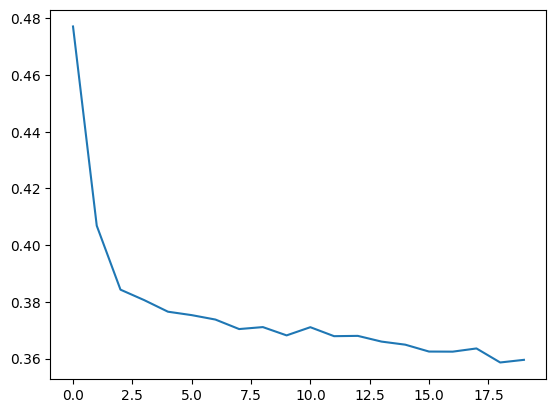

In [121]:
loss = training.history['loss']

plt.plot(loss)

# 6. Resultados

In [122]:
# Prep the test data
test_data = scaled_data[training_data_len - 60:]
X_test, y_test = [], dataset[training_data_len:,12]


for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],14))

In [123]:
predictions = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [124]:
predictions.shape

(431, 1)

In [125]:
predictions

array([[ 2.0473342 ],
       [ 1.9035592 ],
       [ 2.5523248 ],
       [ 2.0986705 ],
       [ 1.9363408 ],
       [ 2.1275053 ],
       [ 1.8432281 ],
       [ 1.593324  ],
       [ 1.0384879 ],
       [ 0.8242453 ],
       [ 0.57132775],
       [ 0.34814537],
       [ 0.00583871],
       [ 0.35746962],
       [ 0.68971366],
       [ 0.816487  ],
       [ 0.8533501 ],
       [ 0.98558635],
       [ 0.203466  ],
       [ 0.02515393],
       [ 0.23766464],
       [ 0.17535233],
       [-0.09061706],
       [-0.0842486 ],
       [-0.23529455],
       [-0.11855245],
       [-0.01453415],
       [ 0.32721335],
       [ 0.57548505],
       [ 0.8249324 ],
       [ 1.5879388 ],
       [ 1.4068375 ],
       [ 2.9765253 ],
       [ 2.9942603 ],
       [ 1.1290584 ],
       [ 1.0105438 ],
       [ 2.1685252 ],
       [ 2.7190444 ],
       [ 1.5034206 ],
       [ 1.0821235 ],
       [ 2.070715  ],
       [ 2.013764  ],
       [ 1.0940645 ],
       [ 0.73156077],
       [ 0.66468924],
       [ 0

In [126]:
predictions = np.repeat(predictions, 14, axis=1)
predictions_final = scaler.inverse_transform(predictions)

In [136]:
predictions_final[:,12]

array([114.05346 , 109.51833 , 129.98247 , 115.67277 , 110.552376,
       116.58231 , 107.6153  ,  99.73253 ,  82.231224,  75.473335,
        67.49551 ,  60.455624,  49.658176,  60.749737,  71.229774,
        75.228615,  76.39139 ,  80.562546,  55.89197 ,  50.26744 ,
        56.970707,  55.00518 ,  46.615654,  46.816536,  42.052067,
        45.73448 ,  49.015553,  59.79536 ,  67.62664 ,  75.495   ,
        99.56266 ,  93.85014 , 143.36311 , 143.92253 ,  85.088104,
        81.349785, 117.87621 , 135.24133 ,  96.89669 ,  83.607635,
       114.79096 , 112.994545,  83.98429 ,  72.54977 ,  70.44042 ,
        65.74806 ,  61.20793 ,  71.29665 ,  68.183655,  73.837234,
       107.16999 ,  73.26322 ,  58.136612,  56.683525,  73.03623 ,
        90.87979 ,  78.59573 ,  93.98602 ,  73.15481 ,  67.40832 ,
        56.90858 ,  49.73981 ,  63.327755,  86.79376 ,  81.262825,
        61.10669 ,  65.84521 ,  60.574055,  67.79994 ,  66.353264,
        52.40755 ,  59.05015 ,  75.1526  ,  56.05318 ,  74.862

In [137]:
train = df[['AporCaudal']][:training_data_len]
test =  df[['AporCaudal']][training_data_len:]

In [138]:
train.tail(1)

,AporCaudal
Date,
2022-06-26,143.558


In [139]:
test.head(1)

,AporCaudal
Date,
2022-06-27,128.342


In [140]:
predictions = predictions_final[:, 12] 

In [141]:
predictions.shape

(431,)

In [142]:
predictions_df = pd.DataFrame(predictions, index=test.index, columns=["Prediction"])


In [143]:
predictions_df.head(10)

,Prediction
Date,
2022-06-27,114.053459
2022-06-28,109.518333
2022-06-29,129.982468
2022-06-30,115.672768
2022-07-01,110.552376
2022-07-02,116.582314
2022-07-03,107.615303
2022-07-04,99.732529
2022-07-05,82.231224


In [144]:
test

,AporCaudal
Date,
2022-06-27,128.342
2022-06-28,135.550
2022-06-29,173.183
2022-06-30,144.372
2022-07-01,125.399
...,...
2023-08-27,40.475
2023-08-28,39.386
2023-08-29,32.565


In [145]:
predictions.shape

(431,)

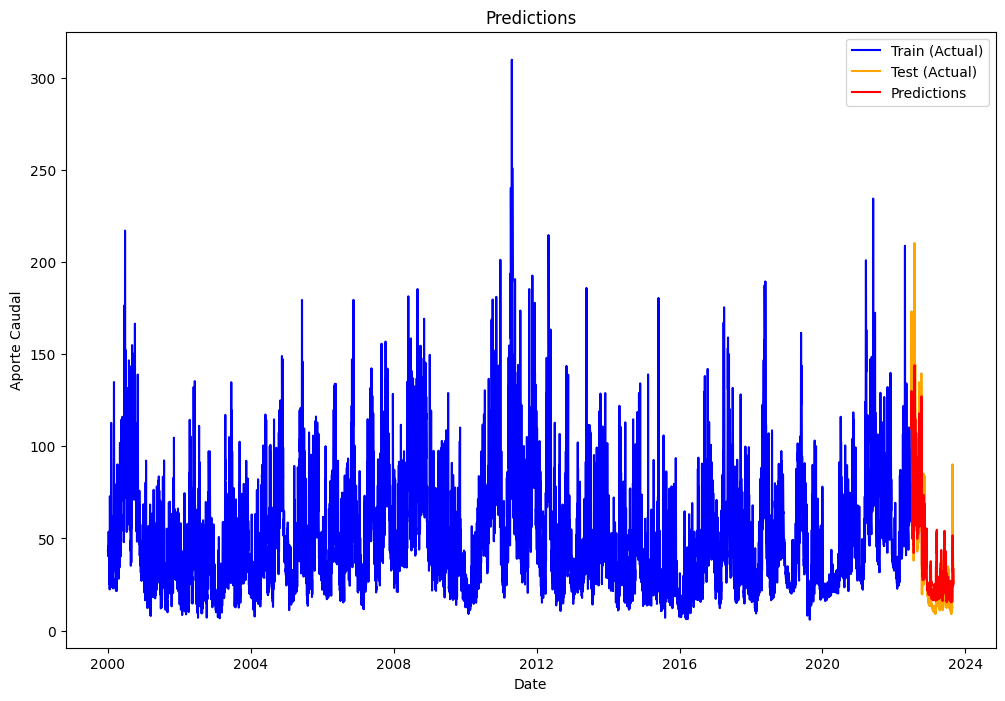

In [146]:
plt.figure(figsize=(12,8))
plt.plot(train, label="Train (Actual)", color='blue')
plt.plot(test, label="Test (Actual)", color='orange')
plt.plot(predictions_df, label="Predictions", color='red')
plt.title("Predictions")
plt.xlabel("Date")
plt.ylabel("Aporte Caudal")
plt.legend()
plt.show()

In [147]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['AporCaudal'],predictions_df['Prediction']))
print(rmse)

13.633554446470185
